In [1]:
# References
# https://www.ntlk.org
# https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_tutorial.pdf
# https://scikit-learn.org/stable/modules/feature_extraction.html
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://www.machinelearningplus.com/nlp/cosine-similarity/#3cosinesimilarityexample
# https://radimrehurek.com/gensim/
# https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
# https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

import gensim
import gensim.downloader as api

## Table of Contents
1. **NLTK**
     - Tokenization  
     - Stopwords  
     - Stemming & Lemmatization  
     - Word Replacement (*advanced*)  
     - Distance Metrics  
2. **Scikit Learn**  
     - Vectorization  
     - Cosine Similarity  
3. **Gensim**  
     - Soft Cosine Similarity  

## Prerequisite Topics
1. **Basic Python**
2. **Pandas**
3. **Regex** (*advanced topics only*)
4. **Seaborn** (*optional topics only*)

# **NLTK**  
(Natural Language Toolkit)  
A suite of text processing libraries for classification, tokenization, stemming, tagging, etc.  

In [2]:
# only first time
# nltk.download()

## Tokenizing Text  
Tokenization- process of breaking up strings into tokens which in turn are small structures/units

#### word_tokenize module 
- splits a string into tokens

In [3]:
# from package import class
# from nltk.tokenizer import word_tokenize

bama_string = 'On January 11, 2021, Saban\'s Alabama Crimson Tide defeated the Ohio State Buckeyes 52-24 to win the National Championship.'
my_tokens = nltk.tokenize.word_tokenize(bama_string)
my_tokens

['On',
 'January',
 '11',
 ',',
 '2021',
 ',',
 'Saban',
 "'s",
 'Alabama',
 'Crimson',
 'Tide',
 'defeated',
 'the',
 'Ohio',
 'State',
 'Buckeyes',
 '52-24',
 'to',
 'win',
 'the',
 'National',
 'Championship',
 '.']

#### WordPunctTokenizer class
- splits all punctuation into separate tokens

In [4]:
tknzr = nltk.tokenize.WordPunctTokenizer()
my_tokens = tknzr.tokenize(bama_string)
my_tokens

['On',
 'January',
 '11',
 ',',
 '2021',
 ',',
 'Saban',
 "'",
 's',
 'Alabama',
 'Crimson',
 'Tide',
 'defeated',
 'the',
 'Ohio',
 'State',
 'Buckeyes',
 '52',
 '-',
 '24',
 'to',
 'win',
 'the',
 'National',
 'Championship',
 '.']

#### sent_tokenizer module
- split text/paragraph into sentences

In [5]:
para_string = 'I took the dog for a walk. After five minutes, it began to rain. We ran back to the house.'
my_tokens = nltk.tokenize.sent_tokenize(para_string)
my_tokens

['I took the dog for a walk.',
 'After five minutes, it began to rain.',
 'We ran back to the house.']

#### RegexpTokenizer class 
- gives complete control over how to tokenize the text

In [6]:
# example 1: don't split contradictions like "Saban's"
tknzr = nltk.tokenize.RegexpTokenizer("[\w']+")
my_tokens = tknzr.tokenize(bama_string)
my_tokens

['On',
 'January',
 '11',
 '2021',
 "Saban's",
 'Alabama',
 'Crimson',
 'Tide',
 'defeated',
 'the',
 'Ohio',
 'State',
 'Buckeyes',
 '52',
 '24',
 'to',
 'win',
 'the',
 'National',
 'Championship']

In [7]:
# example 2: always tokenize on whitespace
tknzr = nltk.tokenize.RegexpTokenizer('\s+', gaps = True)
my_tokens = tknzr.tokenize(bama_string)
my_tokens

['On',
 'January',
 '11,',
 '2021,',
 "Saban's",
 'Alabama',
 'Crimson',
 'Tide',
 'defeated',
 'the',
 'Ohio',
 'State',
 'Buckeyes',
 '52-24',
 'to',
 'win',
 'the',
 'National',
 'Championship.']

#### TweetTokenizer class 
- best tokenizer for emojis

In [8]:
emoji_string = 'LeBron carried the team as usual🔥💯 He\'s STILL the best player at 36👏😤'
tknzr = nltk.tokenize.TweetTokenizer()
my_tokens = tknzr.tokenize(emoji_string)
my_tokens

['LeBron',
 'carried',
 'the',
 'team',
 'as',
 'usual',
 '🔥',
 '💯',
 "He's",
 'STILL',
 'the',
 'best',
 'player',
 'at',
 '36',
 '👏',
 '😤']

## Stopwords  
Words that are present in text but do not contribute to the meaning of a sentence

#### English Stopwords

In [9]:
# English is one of 15 languages with a preloaded set of stopwords
english_stops = nltk.corpus.stopwords.words('english')
# there are too many to show, but listed below are a few examples
english_stops[0:5]

['i', 'me', 'my', 'myself', 'we']

In [10]:
# example: remove stopwords
words = ['I', 'am', 'a', 'student', 'at', 'the', 'University', 'in', 'Switzerland']
[word for word in words if word not in english_stops]

['I', 'student', 'University', 'Switzerland']

(Important application of stopwords in topic 3)

## Stemming and Lemmatization

### Stemming  
- Technique used to extract the base form of words by removing affixes (root stem)
- Looks at form of the word

#### PorterStemmer class 

In [11]:
word_stemmer = nltk.stem.PorterStemmer()
word_stemmer.stem('writing')

'write'

#### LancasterStemmer class 

In [12]:
word_stemmer = nltk.stem.LancasterStemmer()
word_stemmer.stem('written')

'writ'

#### RegexpStemmer class  
- Takes in a single regular expression, removes any prefix or suffix that matches that expression

In [13]:
word_stemmer = nltk.stem.RegexpStemmer('ing')
word_stemmer.stem('ingwriting')

'writ'

#### SnowballStemmer class  
- works with multiple languages

In [14]:
French_stemmer = nltk.stem.SnowballStemmer('french')
French_stemmer.stem('Bonjoura')

'bonjour'

### Lemmatization
- Technique used to extract the base form of words by finding root word
- Looks at meaning of the word

In [15]:
word_lemmatizer = nltk.stem.WordNetLemmatizer()
word_lemmatizer.lemmatize('believes')

'belief'

- Difference versus stemming

In [16]:
word_stemmer = nltk.stem.LancasterStemmer()
word_stemmer.stem('believes')

'believ'

## Word Replacement

### Word Replacement Using Regex

In [17]:
import re

# Example: replace contractions with expanded forms
# Define replacement patterns
R_patterns = [
    (r'won\'t', 'will not'),
    (r'can\'t', 'cannot'),
    (r'are\'nt', 'are not'),
    (r'I\'m', 'I am'),
    # etc
]
# Create a class used to replace words
class REReplacer(object):
    def __init__(self, patterns = R_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

# Use created class to replace contractions
sample_doc = REReplacer()
sample_doc.replace('I won\'t do it.')

'I will not do it.'

### Removal of Repeating Characters

In [18]:
# Create a class used to remove repeating characters
class Rep_char_removal(object):
    def __init__(self):
        self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if nltk.corpus.wordnet.synsets(word):
            return word
        repl_word = self.repeat_regexp.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

# Use created class to remove repeated characters
sample_doc = Rep_char_removal()
print(sample_doc.replace('Helloooo'))
print(sample_doc.replace('Bigggger'))
print(sample_doc.replace('Hiiiiiii'))

Hello
Bigger
Hi


## Distance Metrics

#### edit_distance(s1, s2)  
- Calculates the number of characters that need to be substituted, inserted, or deleted to transform s1 into s2
- It's possible to weigh subsitution edits differently (default 1)

In [19]:
s1 = 'Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss'
s2 = 'Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win'

edit_distance = nltk.edit_distance(s1, s2)
edit_distance

21

#### edit_proportion

In [20]:
edit_proportion = round(nltk.edit_distance(s1, s2) / len(s1), 4)
edit_proportion

0.2692

In [21]:
s3 = 'Javale McGee scored 10 points, and grabbed 5 rebounds in a loss'
s4 = 'The square root of 49 is 7'

player_list = [s1, s2, s3, s4]
target_player = player_list[1]

for comparison_player in player_list:
    edit_distance = nltk.edit_distance(comparison_player, target_player)
    edit_percent = round(100*edit_distance/len(comparison_player), 2)
    print('Transform')
    print(f'  - {comparison_player}')
    print('Into')
    print(f'  - {target_player}')
    print(f'     - edit distance: {edit_distance}')
    print(f'     - edit percent: {edit_percent}')
    print('*'*75)

Transform
  - Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss
Into
  - Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win
     - edit distance: 21
     - edit percent: 26.92
***************************************************************************
Transform
  - Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win
Into
  - Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win
     - edit distance: 0
     - edit percent: 0.0
***************************************************************************
Transform
  - Javale McGee scored 10 points, and grabbed 5 rebounds in a loss
Into
  - Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win
     - edit distance: 35
     - edit percent: 55.56
***************************************************************************
Transform
  - The square root of 49 is 7
Into
  - Stephen Curry scored 

#### Creating a Pandas DataFrame for each edit distance

Indexes = target player  
Columns = comparison player  
Shows edit percent needed to turn comparison player into target player (lower percent = less to edit)  
Edit percent can be greater than 100 due to comparison player needing more edits to turn into target player than the length of comparison player

In [22]:
percent = []
array = []
for target_player_index, target_player in enumerate(player_list):
    for comparison_player_index, comparison_player in enumerate(player_list):
        edit_distance = nltk.edit_distance(comparison_player, target_player)
        edit_percent = round(100*edit_distance/len(comparison_player), 2)
        percent.append(edit_percent)
    array.append(percent)
    percent = []
df = pd.DataFrame(array, index = player_list, columns = player_list)
df

,"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss","Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win","Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",The square root of 49 is 7
"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss",0.00,25.30,58.73,246.15
"Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win",26.92,0.00,55.56,257.69
"Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",47.44,42.17,0.00,196.15
The square root of 49 is 7,82.05,80.72,80.95,0.00


# **Scikit Learn**
- sklearn.feature_extraction.text
- sklearn.metrics.pairwise

## Vectorization
- The general process of turning a collection of text documents into numerical feature vectors
- Tokenization, counting, normalization process
- Documents are described by word occurences, while ignoring positional information of the words in the document

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(player_list)

In [24]:
X

<4x26 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

### Count Vectorizer  
- **Finds occurences of every word in each document**
- Creates bag-of-words vector
- As seen below, there are 26 unique words (each a column), which matches the size of X above

In [25]:
# Create Document Term Matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(player_list)

In [26]:
# Optional: Convert sparse matrix to Pandas DataFrame to visualize process
player_term_matrix = X.todense()
df = pd.DataFrame(
    player_term_matrix,
    columns = vectorizer.get_feature_names(),
    index = player_list
)
df

,10,11,30,37,49,and,assists,curry,durant,grabbed,...,mcgee,of,points,rebounds,root,scored,square,stephen,the,win
"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss",0,0,0,1,0,1,1,0,1,1,...,0,0,1,1,0,1,0,0,0,0
"Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win",0,1,1,0,0,2,1,1,0,1,...,0,0,1,1,0,1,0,1,0,1
"Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",1,0,0,0,0,1,0,0,0,1,...,1,0,1,1,0,1,0,0,0,0
The square root of 49 is 7,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0


### TF-IDF Vectorizer
- (Term Frequency) * (Inverse Document Frequency)
- Considers **overall document weightage of each word**
- Downweights words that occur frequently across documents

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(player_list)

In [28]:
player_term_matrix = X.todense()
df = pd.DataFrame(
    player_term_matrix,
    columns = vectorizer.get_feature_names(),
    index = player_list
)
df

,10,11,30,37,49,and,assists,curry,durant,grabbed,...,mcgee,of,points,rebounds,root,scored,square,stephen,the,win
"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss",0.000000,0.000000,0.000000,0.369883,0.000000,0.236091,0.291620,0.000000,0.369883,0.236091,...,0.000000,0.000000,0.236091,0.236091,0.000000,0.236091,0.000000,0.000000,0.000000,0.000000
"Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win",0.000000,0.317662,0.317662,0.000000,0.000000,0.405520,0.250449,0.317662,0.000000,0.202760,...,0.000000,0.000000,0.202760,0.202760,0.000000,0.202760,0.000000,0.317662,0.000000,0.317662
"Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",0.406019,0.000000,0.000000,0.000000,0.000000,0.259157,0.000000,0.000000,0.000000,0.259157,...,0.406019,0.000000,0.259157,0.259157,0.000000,0.259157,0.000000,0.000000,0.000000,0.000000
The square root of 49 is 7,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.408248,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.408248,0.000000


## Cosine Similarity
- A metric used to determine how similar documents are, regardless of their size
- Mathematically:
     - Measures the cosine of the angle between two vectors projected in a multi-dimensional space
     - These two vectors are arrays containing the word counts (in this case, word weightages) of two documents (found using vectorizer classes above)
- Advantages:
     - Even if two documents are far apart in size, they could still be similar if they have many words in common
     - In this case, Euclidean distance (measure of magnitude) would be large, but Cosine Similarity would show the two documents being similar due to the small angle between them

In [29]:
cosine_similarity(df, df)

array([[1.        , 0.48116027, 0.46045865, 0.        ],
       [0.48116027, 1.        , 0.36782629, 0.        ],
       [0.46045865, 0.36782629, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [30]:
# Turn cosine similarity 2D array into a Pandas DataFrame
df = pd.DataFrame(
    cosine_similarity(df, df),
    columns = player_list,
    index = player_list
)

round(df, 2)

,"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss","Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win","Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",The square root of 49 is 7
"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss",1.00,0.48,0.46,0.0
"Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win",0.48,1.00,0.37,0.0
"Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",0.46,0.37,1.00,0.0
The square root of 49 is 7,0.00,0.00,0.00,1.0


- Using TF-IDF Vectorizer, the result of cosine_similarity is equal to the result of linear_kernel, since the squared values and summation of all values is equal to 1 (least square normalized)
- This would not be the case if we used the Count Vectorizer

# **Gensim**
- Represent text as semantic vectors
- Find semantically related documents
- Semantic NLP models

**Core Concepts**
1. Document: some text (*equivalent to a string in Python*)
2. Corpus: a collection of documents (*similar to a list in Python*)
3. Vector: a mathematically convenient representation of a document
4. Model: an algorithm for transforming vectors from one representation to another

**Instructions for first time installation** (through terminal)  
- Gensim  
  - pip install --upgrade gensim  (currently running version 4.0.1) 
- Levenshtein  
  - python extension for computing string edit distances and similarities
  - this installation is optional, but if not installed a warning will appear when importing gensim saying that the gensim.similarities.levenshtein submodule is disabled
  - pip install python-Levenshtein


## Soft Cosine Similarity Measure
- Similarity metric that gives higher scores for documents belonging to the same topic, lower scores for documents belonging to different topics
- Considers the **semantic meaning** of words, rather than specific letters in text

In [31]:
# First, add in a couple sentences pertaining to a similar topic
s4 = 'The best french toast I ever tasted was from a cafe in Philadelphia. The maple syrup was definitely a highlight.'
s5 = 'Vanilla ice cream is probably my favorite desert. There is a shop on Long Beach Island that absolutely makes the best vanilla ice cream out there.'

# Important for later: s1, s2, s3 pertain to basketball, while s4 and s5 pertain to food
topic_list = [s1, s2, s3, s4, s5]
# Make a copy of topic_list to be used later, since topic_list will be modified for vectorization
topic_list_doc = topic_list

**1.** remove english stopwords (see topic 1.2), which will be irrelevant in calculating semantic similarities

In [32]:
english_stops = nltk.corpus.stopwords.words('english')
# Step 1: split each document into individual words
s1 = s1.lower().split()
s2 = s2.lower().split()
s3 = s3.lower().split()
s4 = s4.lower().split()
s5 = s5.lower().split()

In [33]:
# Step 2: remove stepwords from each document
s1 = [word for word in s1 if word not in english_stops]
s2 = [word for word in s2 if word not in english_stops]
s3 = [word for word in s3 if word not in english_stops]
s4 = [word for word in s4 if word not in english_stops]
s5 = [word for word in s5 if word not in english_stops]

**2.** Prepare a dictionary/corpus, convert sentences into bag-of-words vectors

In [34]:
topic_list = [s1, s2, s3, s4, s5]
# Builds a dictionary
dictionary = gensim.corpora.Dictionary(topic_list)

In [35]:
topic_list_bow = []
for topic in topic_list:
    topic = dictionary.doc2bow(topic)
    topic_list_bow.append(topic)

In [36]:
# Visualize bag-of-words vectors (only first two documents shown)
# Each word is assigned a number, followed by a number of occurences in each document
topic_list_bow[0:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(3, 1),
  (5, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)]]

**3.** Download embeddings to construct a term similarity matrix
- Word embeddings are vector representations of a particular word
- Word2Vec is a method to construct word embeddings, obtained in this case using continuous bag-of-words (CBOW)

In [37]:
# should take approximately 30 seconds to load
# 'glove-wiki-gigaword-50' is a pre-trained word to vector model based on wikipedia
# https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html (see link for additional models)
w2v_model = api.load('glove-wiki-gigaword-50')
similarity_index = gensim.similarities.WordEmbeddingSimilarityIndex(w2v_model)
similarity_matrix = gensim.similarities.SparseTermSimilarityMatrix(similarity_index, dictionary)

100%|██████████| 46/46 [00:00<00:00, 110.46it/s]


**4.** Find Soft Cosine Similarities

In [38]:
similarity = similarity_matrix.inner_product(topic_list_bow[0], topic_list_bow[1], normalized = (True, True))
similarity

0.8714281

As seen above, there is a very high soft cosine similarity between the first two documents, which makes sense considering they both involve basketball statlines. Below, we can construct a matrix for the similarities between each of the five documents.

In [39]:
# 2D array for entire matrix
soft_cossim_matrix = []
# array for a single row
sim = []

for topic_index, topic in enumerate(topic_list_bow):
    for topic_similarity_index, topic_sim in enumerate(topic_list_bow):
        sim.append(similarity_matrix.inner_product(topic_list_bow[topic_index], topic_list_bow[topic_similarity_index], normalized = (True, True)))
    soft_cossim_matrix.append(sim)
    sim = []

soft_cossim_matrix = pd.DataFrame(soft_cossim_matrix, index = topic_list_doc, columns = topic_list_doc)
round(soft_cossim_matrix, 2)

,"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss","Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win","Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",The best french toast I ever tasted was from a cafe in Philadelphia. The maple syrup was definitely a highlight.,Vanilla ice cream is probably my favorite desert. There is a shop on Long Beach Island that absolutely makes the best vanilla ice cream out there.
"Kevin Durant scored 37 points, grabbed 8 rebounds, and had 6 assists in a loss",1.00,0.87,0.80,0.00,0.00
"Stephen Curry scored 30 points, and grabbed 4 rebounds, and had 11 assists in a win",0.87,1.00,0.78,0.00,0.04
"Javale McGee scored 10 points, and grabbed 5 rebounds in a loss",0.80,0.78,1.00,0.00,0.00
The best french toast I ever tasted was from a cafe in Philadelphia. The maple syrup was definitely a highlight.,0.00,0.00,0.00,1.00,0.44
Vanilla ice cream is probably my favorite desert. There is a shop on Long Beach Island that absolutely makes the best vanilla ice cream out there.,0.00,0.04,0.00,0.44,1.00


As expected, documents 1-3 are all very similar to each other. Likewise, documents 4 and 5 are relatively similar (44%).

*Optional*:

**5.** Generate heatmap using Seaborn for better visualization of percent similarity between documents

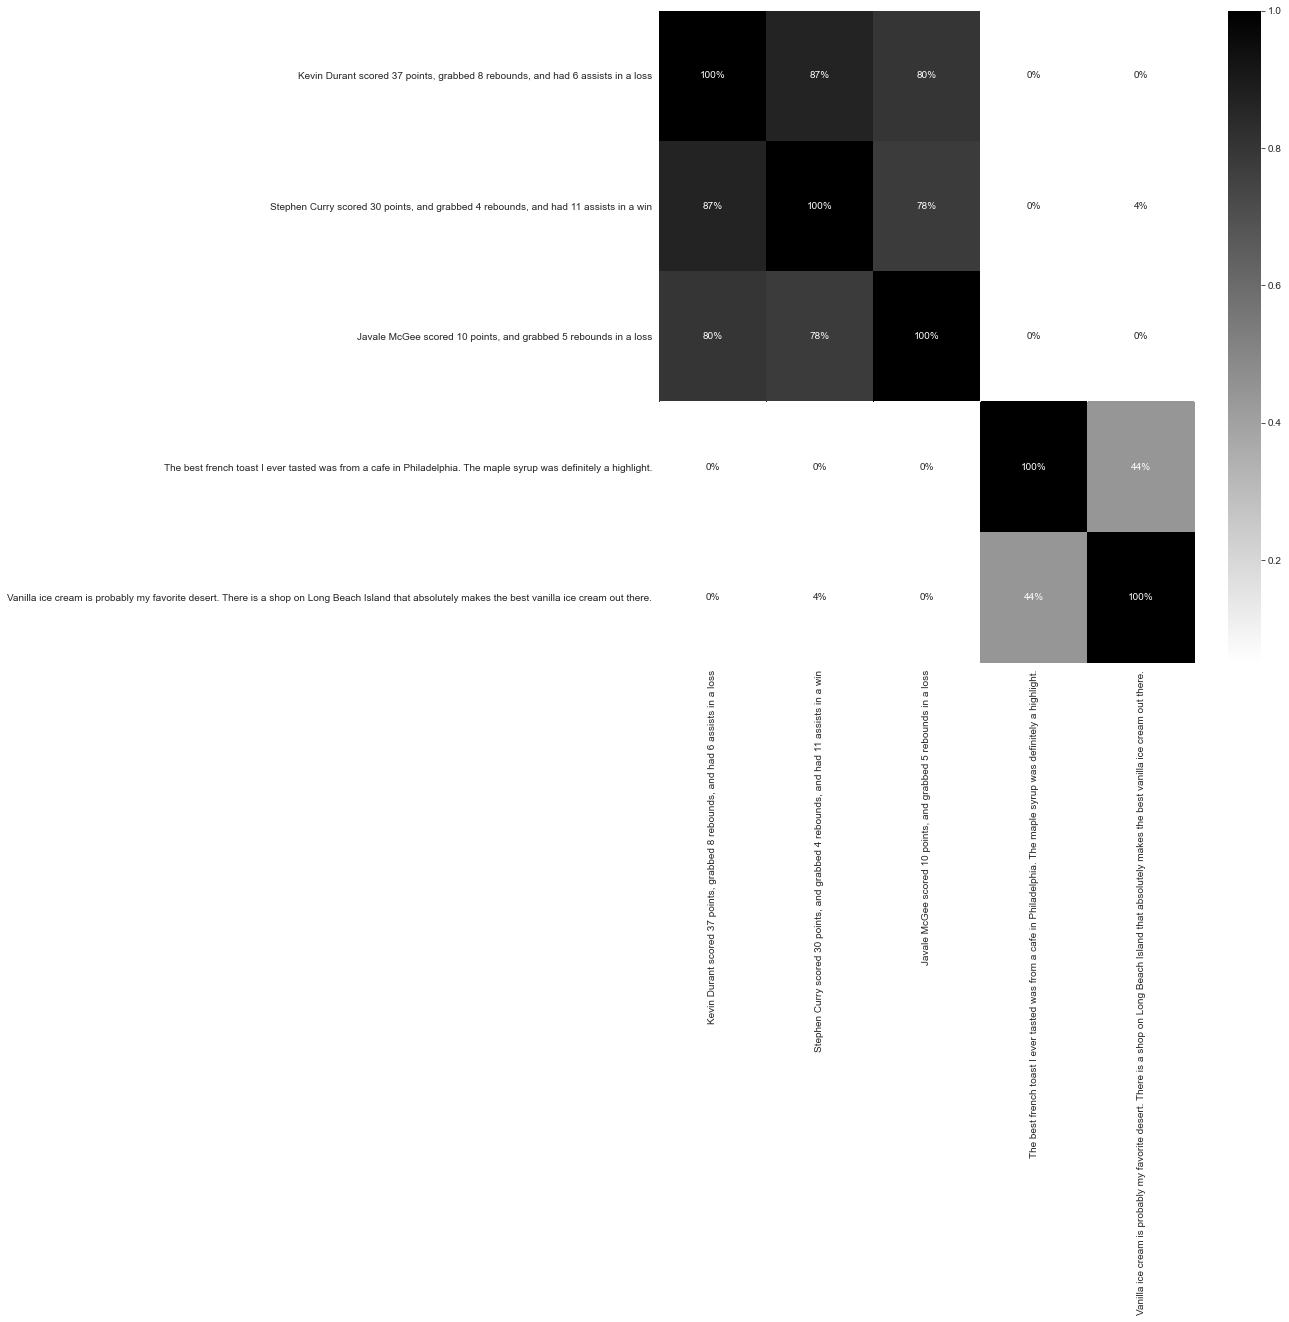

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (12, 12))

sns.heatmap(
    round(soft_cossim_matrix, 2),
    vmin = 0.05,
    vmax = 1,
    cmap = 'binary',
    annot = True,
    fmt = '.0%'
)

plt.show()